In [1]:
using Perla1, Parameters, ProgressMeter, Plots
gr(fmt = :png)

Plots.GRBackend()

# Find \eta

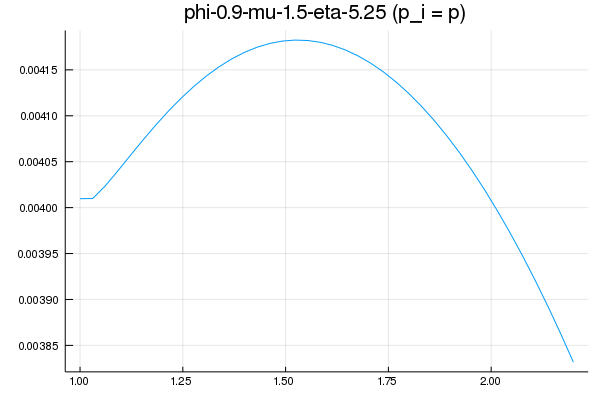

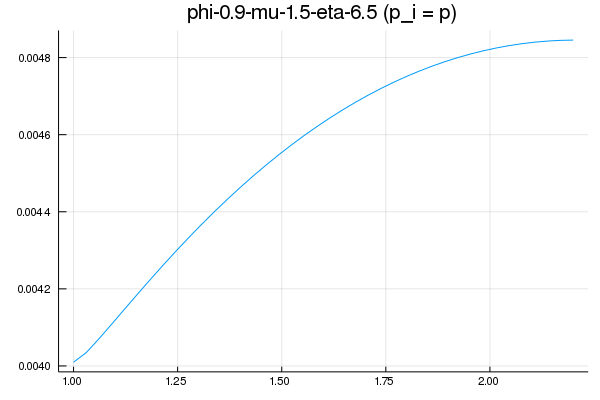

In [2]:
ϕ = 0.9
θ = 0.06 # the defauls for the aggregates, looking for unilateral deviations from those
μs = [1.5]
ηs = [5.25; 6.5]
for μ in μs
    for η in ηs
        θ = 0.06 # the defauls for the aggregates, looking for unilateral deviations from those
        params = stationary_params_default();
        industry_params = merge(industry_params_default(η = η, ϕ = ϕ), params);


        industry_settings = merge(stationary_settings_default(),
                                industry_settings_default(ignore_p_i_deviations = false,
                                                          trace_iterations = true));

        # parameters for experiment
        industry_params = merge(industry_params, (η = η,))
        θ_i = θ

        # display grid
        μ_grid_min = 1.0;
        μ_grid_max = 2.2;
        μ_i_grid = range(μ_grid_min, μ_grid_max, length = 40);

        industry_aggregates, ss_aggregate = Perla1.industry_aggregates_for_tests(θ, μ, industry_params, industry_settings);
        objective_data = [-Perla1.industry_equilibrium_objective([θ_i, μ_i], industry_params, industry_settings, industry_aggregates) for μ_i in μ_i_grid]

        title = string("phi-", ϕ, "-mu-", μ, "-eta-", η)
        display(plot(μ_i_grid, objective_data, legend = false, title = string(title, " (p_i = p)")))

        savefig(string("delete-this-after-finding-eta/", title))
    end
end